# Import Libraries

In [28]:
pip install pillow

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
import gdown
import zipfile
from sklearn.model_selection import train_test_split
from PIL import Image, ExifTags

# Import Dataset

## Checking for any errors in the dataset

In [15]:
!unzip -t dataset.zip

Streaming output truncated to the last 5000 lines.
    testing: dataset/Mosque/ImageID_FOMI8DA3.jpg   OK
    testing: dataset/Mosque/ImageID_FQ6HT01D.jpg   OK
    testing: dataset/Mosque/ImageID_FRPMAJNK.jpg   OK
    testing: dataset/Mosque/ImageID_FRXWJ6ZS.jpg   OK
    testing: dataset/Mosque/ImageID_FTCOGJO2.jpg   OK
    testing: dataset/Mosque/ImageID_FUPSU5NA.jpg   OK
    testing: dataset/Mosque/ImageID_FV31CQ14.jpg   OK
    testing: dataset/Mosque/ImageID_FV9IIBTY.jpg   OK
    testing: dataset/Mosque/ImageID_FVMQQ91Z.jpg   OK
    testing: dataset/Mosque/ImageID_FVMZP8EG.jpg   OK
    testing: dataset/Mosque/ImageID_FVQF898Y.jpg   OK
    testing: dataset/Mosque/ImageID_FYB1B2MW.jpg   OK
    testing: dataset/Mosque/ImageID_G27ZXZNW.jpg   OK
    testing: dataset/Mosque/ImageID_G27ZXZNW_jpg.rf.86a7cbe287e4e81ef09582ba9c98db1a.jpg   OK
    testing: dataset/Mosque/ImageID_G27ZXZNW_jpg.rf.acc9cbf117f75d38b0246fc57e3ebb7e.jpg   OK
    testing: dataset/Mosque/ImageID_G8XK00UD.jpg   OK
    t

## Extracting the zip folder

In [16]:
z = zipfile.ZipFile('dataset.zip')
z.extractall()
print("Extraction complete!")

Extraction complete!


# Dataset Splitting

In [ ]:
class_names = ['church', 'enough', 'friend', 'love', 'me', 'mosque', 'seat', 'temple', 'you']

image_directories = ['./dataset/train/images', './dataset/valid/images', './dataset/test/images']
label_directories = ['./dataset/train/labels', './dataset/valid/labels', './dataset/test/labels']

output_directory = './sorted_by_class'

for class_name in class_names:
    class_folder = os.path.join(output_directory, class_name)
    os.makedirs(class_folder, exist_ok=True)

for img_dir, lbl_dir in zip(image_directories, label_directories):
    for label_file in os.listdir(lbl_dir):
        label_path = os.path.join(lbl_dir, label_file)
        with open(label_path, 'r') as f:
            lines = f.readlines()

        for line in lines:
            class_id = int(line.split()[0])

            img_file = label_file.replace('.txt', '.jpg')
            img_path = os.path.join(img_dir, img_file)

            if os.path.exists(img_path):
                dest_folder = os.path.join(output_directory, class_names[class_id])
                shutil.copy(img_path, dest_folder)

## Compressing the new dataset folder to a zip file

In [43]:
folder_to_zip = 'preprocessed_dataset'

output_zip_file = 'preprocessed_dataset.zip'

shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Folder '{folder_to_zip}' has been successfully compressed into '{output_zip_file}'")

Folder 'preprocessed_dataset' has been successfully compressed into 'preprocessed_dataset.zip'


## Deleting any folder

In [41]:
shutil.rmtree('path_to_augmented_dataset')

# Exploratory Data Analysis

In [21]:
total_images = 0
total_videos = 0

for root, dirs, files in os.walk("splitted_dataset"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1
        elif file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            total_videos += 1

print(f'{total_images} images')
print(f'{total_videos} videos')

11754 images
0 videos


In [23]:
test_images = 0
train_images = 0
valid_images = 0
test_videos = 0
train_videos = 0
valid_videos = 0

for root, dirs, files in os.walk("splitted_dataset"):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):
            if 'test' in root:
                test_images += 1
            elif 'train' in root:
                train_images += 1
            elif 'valid' in root:
                valid_images += 1
        elif file.endswith(('.mp4', '.avi', '.mkv', '.MOV', '.wmv')):
            if 'test' in root:
                test_videos += 1
            elif 'train' in root:
                train_videos += 1
            elif 'valid' in root:
                valid_videos += 1

print(f'test: {test_images} images, {test_videos} videos')
print(f'train: {train_images} images, {train_videos} videos')
print(f'valid: {valid_images} images, {valid_videos} videos')

test: 1179 images, 0 videos
train: 8244 images, 0 videos
valid: 2331 images, 0 videos


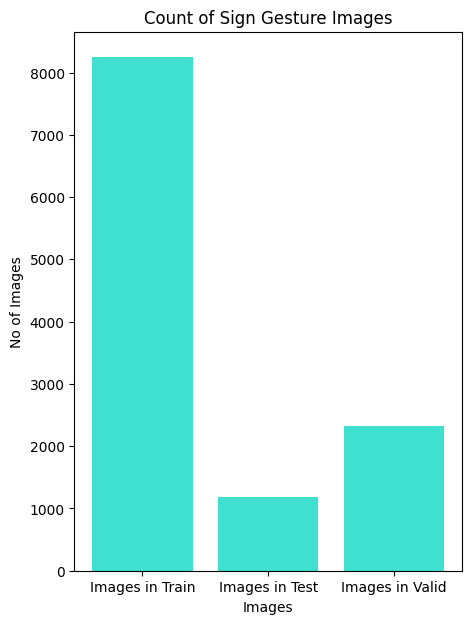

In [24]:
data = {'Images in Train': train_images, 'Images in Test': test_images, 'Images in Valid': valid_images}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Images")
plt.ylabel("No of Images")
plt.title("Count of Sign Gesture Images")
plt.show()

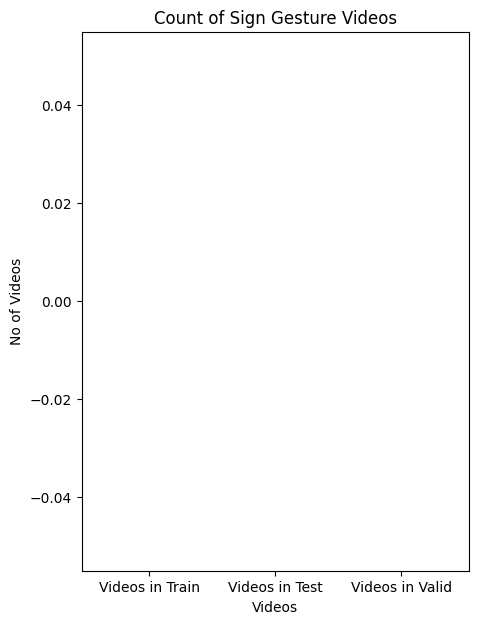

In [25]:
data = {'Videos in Train': train_videos, 'Videos in Test': test_videos, 'Videos in Valid': valid_videos}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="turquoise")

plt.xlabel("Videos")
plt.ylabel("No of Videos")
plt.title("Count of Sign Gesture Videos")
plt.show()

# Data Preprocessing

In [38]:
input_dir = 'splitted_dataset'
output_dir = 'preprocessed_dataset'

os.makedirs(output_dir, exist_ok=True)

def preprocess_image(image_path, output_path, size=(640, 640)):
    try:
        with Image.open(image_path) as img:
            try:
                for orientation in ExifTags.TAGS.keys():
                    if ExifTags.TAGS[orientation] == 'Orientation':
                        break
                exif = img._getexif()
                if exif is not None:
                    orientation = exif[orientation]
                    if orientation == 3:
                        img = img.rotate(180, expand=True)
                    elif orientation == 6:
                        img = img.rotate(270, expand=True)
                    elif orientation == 8:
                        img = img.rotate(90, expand=True)
            except (AttributeError, KeyError, IndexError):
                pass

            img = img.resize(size)

            img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if "_jpg.rf." in file:
            print(f"Skipping already preprocessed Roboflow image: {image_path}")
            continue

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, file)

            preprocess_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Preprocessing complete.")

Streaming output truncated to the last 5000 lines.
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_CCAR78WY_jpg.rf.57abd3cf7776621b748d37a61726bb66.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_R3BGBNKQ_jpg.rf.14b79b260b4b261a22c625452d11ecd1.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_JGC23UW5_jpg.rf.42c6f773de440ec2983caf6f2a430383.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_Y0EL310P_jpg.rf.6c892138122e0b16ae9beb4a2f2cc1ed.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_4398FTMN_jpg.rf.4f844f73bd2e68de202d8354995c50c6.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_T2AFXHNL_jpg.rf.e6c39ae53bec1405d5daede2380b6bb1.jpg
Skipping already preprocessed Roboflow image: splitted_dataset/test/Mosque/ImageID_YCKQA8KF_jpg.rf.2987d65d34eb1a86945f3c5968a04d9a.j

# Data Augmentation

In [40]:
input_dir = 'preprocessed_dataset'
output_dir = 'augmented_dataset'

os.makedirs(output_dir, exist_ok=True)

def augment_image(image_path, output_path):
    try:
        with Image.open(image_path) as img:
            flipped_img = img.transpose(method=Image.FLIP_LEFT_RIGHT)
            flipped_img.save(output_path)

    except Exception as e:
        print(f"Error processing {image_path}: {e}")

for root, dirs, files in os.walk(input_dir):
    for file in files:
        image_path = os.path.join(root, file)

        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            relative_path = os.path.relpath(root, input_dir)
            output_subfolder = os.path.join(output_dir, relative_path)
            os.makedirs(output_subfolder, exist_ok=True)

            output_image_path = os.path.join(output_subfolder, f"flipped_{file}")

            augment_image(image_path, output_image_path)
        else:
            print(f"Skipping non-image file: {image_path}")

print("Data augmentation complete.")

Data augmentation complete.
